<a href="https://colab.research.google.com/github/Susithra05/abc/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer

In [6]:
data = pd.read_csv("/Delhi_v2.csv")

In [7]:
data

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,28.635272,77.370395,2.0,2.0,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,7214.611872
7734,7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,28.581431,77.452819,2.0,2.0,3.0,NaN,Resale,NaN,Semi-Furnished,NaN,ek murti chowk,Flat,\n \n \n...,4254.716981
7735,7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,28.625850,77.435336,4.0,3.0,5.0,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n \n \n...,3688.092729
7736,7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,28.701622,77.430153,3.0,3.0,2.0,Ready to Move,Resale,1.0,NaN,3.0,vvip mall,Flat,\n \n \n...,4642.857143


In [8]:
data.info

<bound method DataFrame.info of       Unnamed: 0       price  \
0              0   5600000.0   
1              1   8800000.0   
2              2  16500000.0   
3              3   3810000.0   
4              4   6200000.0   
...          ...         ...   
7733        7733   7900000.0   
7734        7734   4510000.0   
7735        7735   7000000.0   
7736        7736   6500000.0   
7737        7737   6500000.0   

                                                Address    area   latitude  \
0                     Noida Extension, Noida, Delhi NCR  1350.0  28.608850   
1                         Sector 79, Gurgaon, Delhi NCR  1490.0  28.374236   
2                        Vaishali, Ghaziabad, Delhi NCR  2385.0  28.645769   
3     Link Road, F Block, Sector 50, Noida, Uttar Pr...  1050.0  28.566914   
4     Jaypee Pavilion Court Sector 128, Noida, Secto...  1350.0  28.520732   
...                                                 ...     ...        ...   
7733                  Indirapuram, Gh

In [10]:
data.describe()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7738.000000,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000
mean,3868.500000,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241
std,2233.912524,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307
min,0.000000,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,1934.250000,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915
50%,3868.500000,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332
75%,5802.750000,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693
max,7737.000000,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [21]:
data=data.drop(['parking','Furnished_status','Lift','Landmarks','type_of_building','desc'],axis=1)

Text(0.5, 1.0, 'missing values')

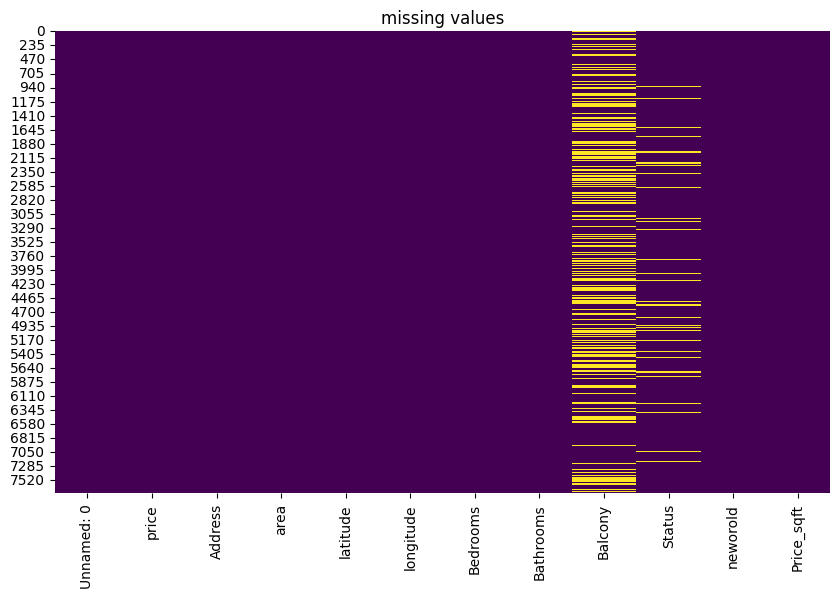

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
plt.title("missing values")

In [23]:
df=pd.DataFrame(data)

In [24]:
df

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,4592.592593
...,...,...,...,...,...,...,...,...,...,...,...,...
7733,7733,7900000.0,"Indirapuram, Ghaziabad, Delhi NCR",1095.0,28.635272,77.370395,2.0,2.0,NaN,Ready to Move,Resale,7214.611872
7734,7734,4510000.0,"Greater Noida, Sector 2, Greater Noida, Delhi NCR",1060.0,28.581431,77.452819,2.0,2.0,3.0,NaN,Resale,4254.716981
7735,7735,7000000.0,"Crossings Republik, Ghaziabad, Delhi NCR",1898.0,28.625850,77.435336,4.0,3.0,5.0,Ready to Move,Resale,3688.092729
7736,7736,6500000.0,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte...",1400.0,28.701622,77.430153,3.0,3.0,2.0,Ready to Move,Resale,4642.857143
